# Introduction
In this dataset, we'll be analyzing a little over 10k red & white wines ingredients focusing on whether or not a specific ingredient can control the quality if the wine.

There will be several factors to consider such as quality or acidity (fixed acidity, volatile acidity, citric acid, residual sugar and pH) and others. The goal is to determine whether or not these factors have a direct correlation with the quality of wine.

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [173]:
df_w = pd.read_csv("winequality-white (2).csv", sep=";")
df_w.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6


We investigate our data

In [174]:
df_w.rename(columns={'fixed acidity':'fixed_acidity'}, inplace=True)
df_w.rename(columns={'volatile acidity':'volatile_acidity'}, inplace=True)
df_w.rename(columns={'citric acid':'citric_acid'}, inplace=True)
df_w.rename(columns={'free sulfur dioxide':'free_sulfur_dioxide'}, inplace=True)
df_w.rename(columns={'total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)
df_w.rename(columns={'residual sugar':'residual_sugar'}, inplace=True)

In [175]:
df_w.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6


We changed the columns names so that we can handle data in a better performance

In [176]:
df_w.shape

(4898, 12)

In [177]:
df_w.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


حموضة ثابتة
الحموضة المتطايرة
حمض الستريك
السكر المتبقي
كلوريدات
خالي من ثاني أكسيد الكبريت
إجمالي_أكسيد_الكبريت
كثافة
الرقم الهيدروجيني
الكبريتات
كحول
جودة

fixed_acidity
volatile_acidity
citric_acid
residual_sugar
chlorides	
free_sulfur_dioxide	
total_sulfur_dioxide	
density	
pH	
sulphates	
alcohol	
quality

In [178]:
df_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [179]:
df_w.duplicated().sum()

937

In [180]:
df_w.nunique()

fixed_acidity            68
volatile_acidity        125
citric_acid              87
residual_sugar          310
chlorides               160
free_sulfur_dioxide     132
total_sulfur_dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64

In [181]:
df_r = pd.read_csv("winequality-red (2).csv", sep=";")
df_r.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [182]:
df_r.rename(columns={'fixed acidity':'fixed_acidity'}, inplace=True)
df_r.rename(columns={'volatile acidity':'volatile_acidity'}, inplace=True)
df_r.rename(columns={'citric acid':'citric_acid'}, inplace=True)
df_r.rename(columns={'free sulfur dioxide':'free_sulfur_dioxide'}, inplace=True)
df_r.rename(columns={'total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)
df_r.rename(columns={'residual sugar':'residual_sugar'}, inplace=True)

In [183]:
df_r.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [184]:
df_r.shape

(1599, 12)

In [185]:
df_r.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [186]:
df_r.duplicated().sum()

240

In [187]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [188]:
df_r.nunique()

fixed_acidity            96
volatile_acidity        143
citric_acid              80
residual_sugar           91
chlorides               153
free_sulfur_dioxide      60
total_sulfur_dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

We'll combine the red and white datasets to make the analysis more efficient. Useing NumPy to create a new column that preserves color information, and then use pandas to combine the dataframes

In [189]:
color_red = np.repeat('red', df_r.shape[0])
color_white = np.repeat('white', df_w.shape[0])

 Create Color Columns
Create two arrays as long as the number of rows in the red and white dataframes that repeat the value “red” or “white.” NumPy offers really easy way to do this.

In [190]:
df_r['color'] = color_red
df_r.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [191]:
df_w['color'] = color_white
df_w.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,white


We equaled rhe new columns to the dataframes

In [192]:
df_w = df_r.append(df_w) 
df_w.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [193]:
df_w.to_csv('winequality_edited.csv', index=False)

Save Combined Dataset
Save the newly combined dataframe as `winequality_edited.csv`. 

In [194]:
df = pd.read_csv('winequality_edited.csv')
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


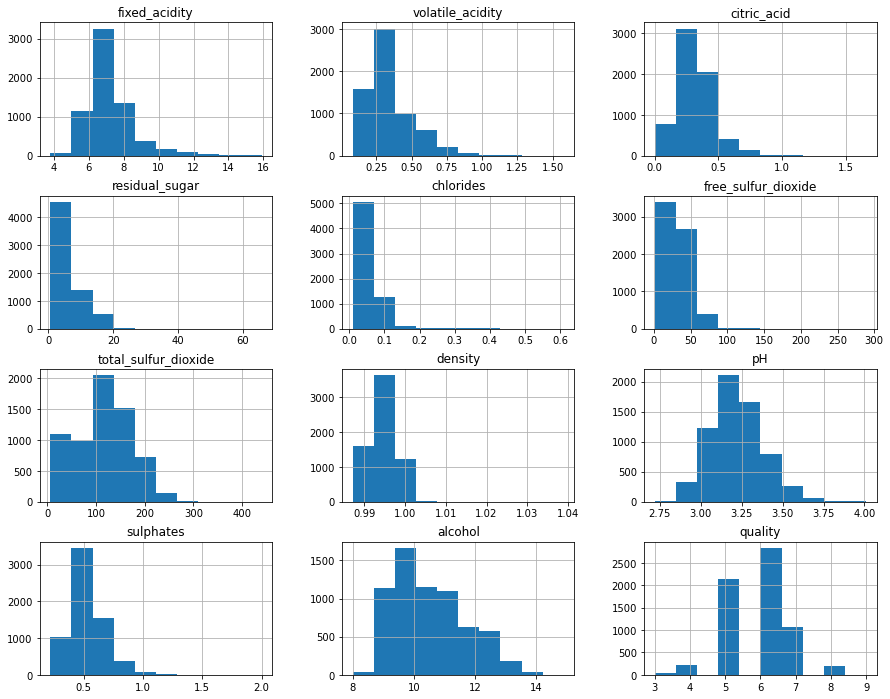

In [195]:
df.hist(figsize=(15,12));

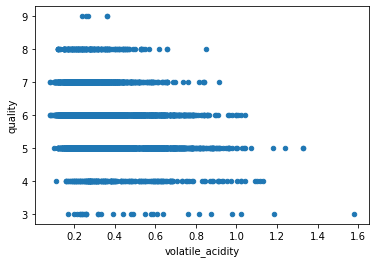

In [196]:
df.plot(x="volatile_acidity", y="quality", kind="scatter");

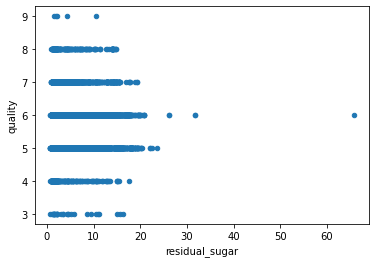

In [197]:
df.plot(x="residual_sugar", y="quality", kind="scatter");

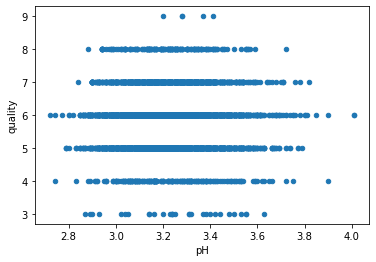

In [198]:
df.plot(x="pH", y="quality", kind="scatter");

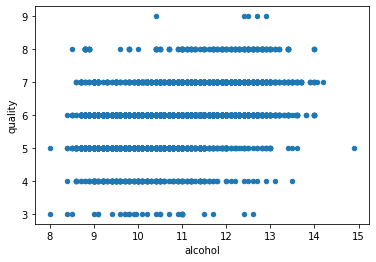

In [199]:
df.plot(x="alcohol", y="quality", kind="scatter");

# Q1: Is a certain type of wine (red or white) associated with higher quality?

For this question, we compared the average quality of red wine with the average quality of white wine with groupby. 

In [200]:
df_Q1 = df.groupby(['color']).quality.mean()
df_Q1

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

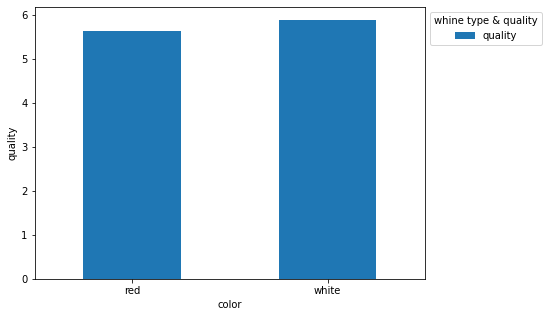

In [201]:
ax = df_Q1.plot(kind='bar', figsize=(7, 5), xlabel='color', ylabel='quality', rot=0)
ax.legend(title='whine type & quality', bbox_to_anchor=(1, 1), loc='upper left')

A1 : white wine has the better quality

### What level of acidity receives the highest average rating?

In [247]:
df.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [248]:
df.describe().pH

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [249]:
df.groupby('color').mean().quality

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

This question is more tricky because unlike color, which has clear categories we can group by (red and white) , pH is a quantitative variable without clear categories. However, there is a simple fix to this. we can create a categorical variable from a quantitative variable by creating our own categories. 

Acidity Levels:
High: Lowest 25% of pH values
..Moderately High: 25% - 50% of pH values
..Medium: 50% - 75% of pH values
..Low: 75% - max pH value

In [250]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [2.72, 3.11, 3.21, 3.32, 4.01] # Fill in this list with five values you just found

In [251]:
# Labels for the four acidity level groups
bin_names = ['high', 'mod_high', 'medium', 'low'] # Name each acidity level category

In [252]:
df['acidity_levels'] = pd.cut(df['pH'], bin_edges, labels=bin_names)


In [253]:
df.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,mod_high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,mod_high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [254]:
# Find the mean quality of each acidity level with groupby
df.groupby('acidity_levels').mean().quality

acidity_levels
high        5.783343
mod_high    5.784540
medium      5.850832
low         5.859593
Name: quality, dtype: float64

Low level of acidity receives the highest mean quality rating

### Q2: Do wines with higher alcoholic content receive better ratings?

In [255]:
df_Q2 = df.groupby(['color']).alcohol.mean()
df_Q2

color
red      10.422983
white    10.514267
Name: alcohol, dtype: float64

White wins receive a better rating

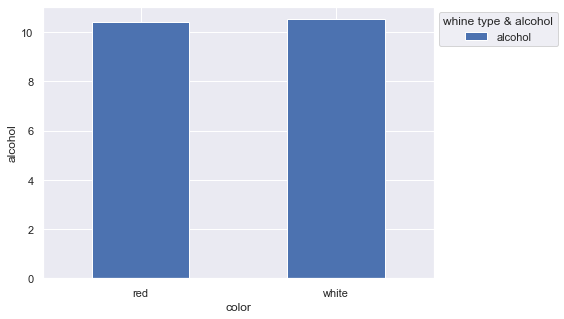

In [256]:
ax = df_Q2.plot(kind='bar', figsize=(7, 5), xlabel='color', ylabel='alcohol', rot=0)
ax.legend(title='whine type & alcohol', bbox_to_anchor=(1, 1), loc='upper left')

Another way to prove that

In [303]:
# get the median amount of alcohol content
df.alcohol.median()

10.3

In [304]:
# select samples with alcohol content less than the median
low_alcohol = df.query('alcohol < 10.3')

In [305]:
# select samples with alcohol content greater than or equal to the median
high_alcohol = df.query('alcohol >= 10.3')



In [306]:
# ensure these queries included each sample exactly once
num_samples = df.shape[0]
num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count() # should be True

True

In [261]:
# get mean quality rating for the low alcohol and high alcohol groups
low_alcohol.quality.mean(), high_alcohol.quality.mean()

(5.475920679886686, 6.146084337349397)

# #3: What level of acidity receives the highest average rating?
Create a bar chart with a bar for each of the four acidity levels.

In [262]:
import seaborn as sns
sns.set_style('darkgrid')

In [263]:
df.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [264]:
df_Q3 = df.groupby('acidity_levels').quality.mean()
df_Q3

acidity_levels
high        5.783343
mod_high    5.784540
medium      5.850832
low         5.859593
Name: quality, dtype: float64

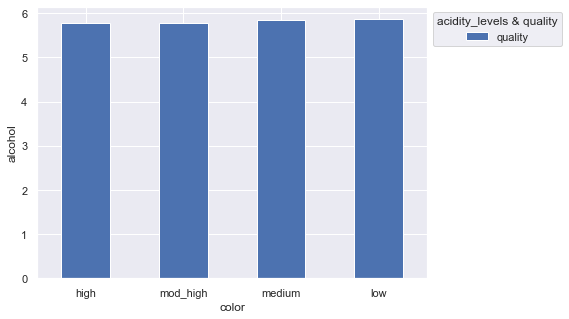

In [265]:
ax = df_Q3.plot(kind='bar', figsize=(7, 5), xlabel='color', ylabel='alcohol', rot=0)
ax.legend(title='acidity_levels & quality', bbox_to_anchor=(1, 1), loc='upper left')

In [266]:
# get counts for each rating and color
color_counts = df_w.groupby(['color', 'quality']).count()['pH']
color_counts

color  quality
red    3            10
       4            53
       5           681
       6           638
       7           199
       8            18
white  3            20
       4           163
       5          1457
       6          2198
       7           880
       8           175
       9             5
Name: pH, dtype: int64

In [267]:
# get total counts for each color
color_totals = df_w.groupby('color').count()['pH']
color_totals

color
red      1599
white    4898
Name: pH, dtype: int64

In [268]:
# get proportions by dividing red rating counts by total # of red samples
red_proportions = color_counts['red'] / color_totals['red']
red_proportions

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
Name: pH, dtype: float64

In [269]:
# get proportions by dividing white rating counts by total # of white samples
white_proportions = color_counts['white'] / color_totals['white']
white_proportions

quality
3    0.004083
4    0.033279
5    0.297468
6    0.448755
7    0.179665
8    0.035729
9    0.001021
Name: pH, dtype: float64

In [276]:
ind = np.arange(len(red_proportions))  # the x locations for the groups
width = 0.35       # the width of the bars

In [277]:
red_proportions['9'] = 0
red_proportions

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
9    0.000000
Name: pH, dtype: float64

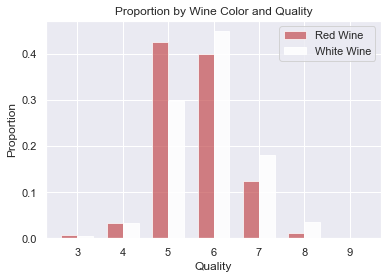

In [285]:
# plot bars
red_bars = plt.bar(ind, red_proportions, width, color='r', alpha=.7, label='Red Wine')
white_bars = plt.bar(ind + width, white_proportions, width, color='w', alpha=.9, label='White Wine')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Quality')
plt.title('Proportion by Wine Color and Quality')
locations = ind + width / 2  # xtick locations
labels = ['3', '4', '5', '6', '7', '8', '9']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()

# Q4 :Do sweeter wines receive better ratings?

In [294]:
df.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [295]:
df['residual_sugar'].median()

3.0

In [308]:
df_s = df.query("residual_sugar < 3.0")

In [309]:
df_b = df.query("residual_sugar >= 3.0")

In [310]:
num_samples = df.shape[0]
num_samples == df_s['quality'].count() + df_b['quality'].count()

True

In [313]:
df_s['quality'].mean(), df_b['quality'].mean()

(5.808800743724822, 5.82782874617737)

# Q5: What chemical characteristics are most important in predicting the quality of wine?

In [315]:
df.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


<AxesSubplot:xlabel='fixed_acidity'>

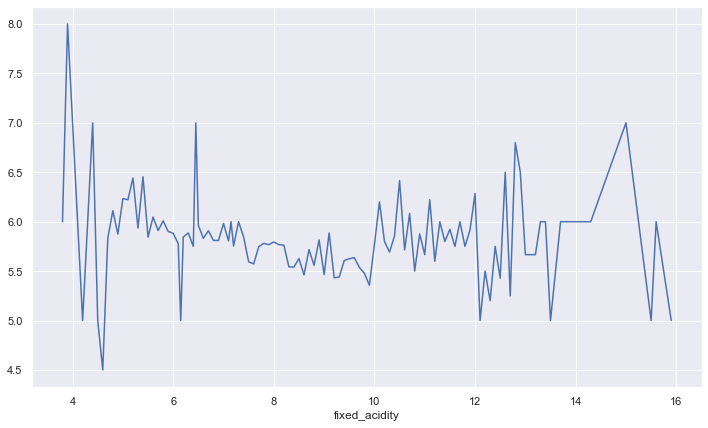

In [359]:
fig, ax = plt.subplots(figsize=(12,7))
df.groupby(['fixed_acidity']).mean()['quality'].plot(ax=ax)

<AxesSubplot:xlabel='volatile_acidity'>

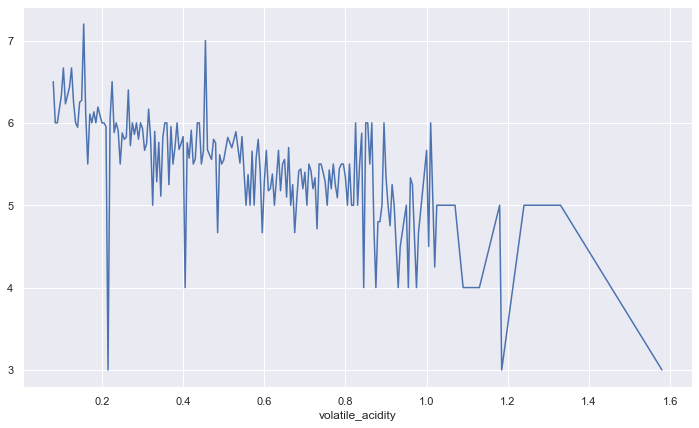

In [360]:
fig, ax = plt.subplots(figsize=(12,7))
df.groupby(['volatile_acidity']).mean()['quality'].plot(ax=ax)

<AxesSubplot:xlabel='citric_acid'>

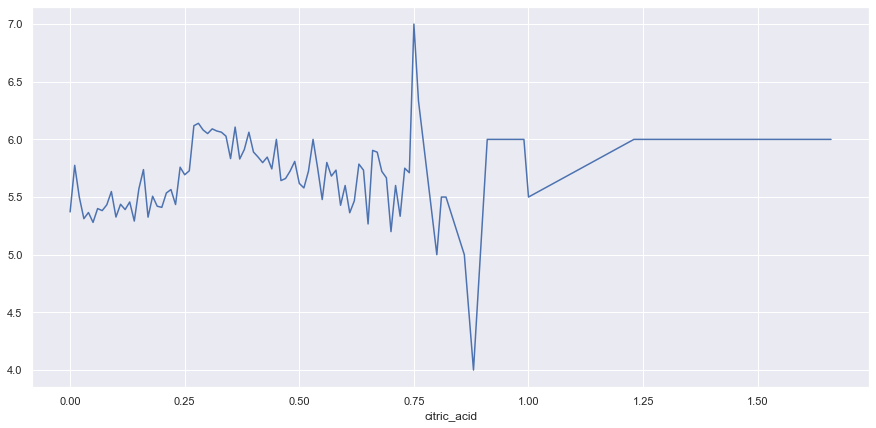

In [356]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['citric_acid']).mean()['quality'].plot(ax=ax)

<AxesSubplot:xlabel='residual_sugar'>

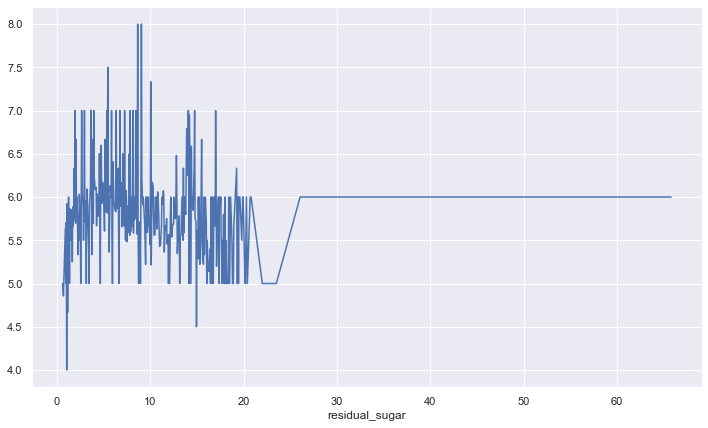

In [361]:
fig, ax = plt.subplots(figsize=(12,7))
df.groupby(['residual_sugar']).mean()['quality'].plot(ax=ax)

<AxesSubplot:xlabel='chlorides'>

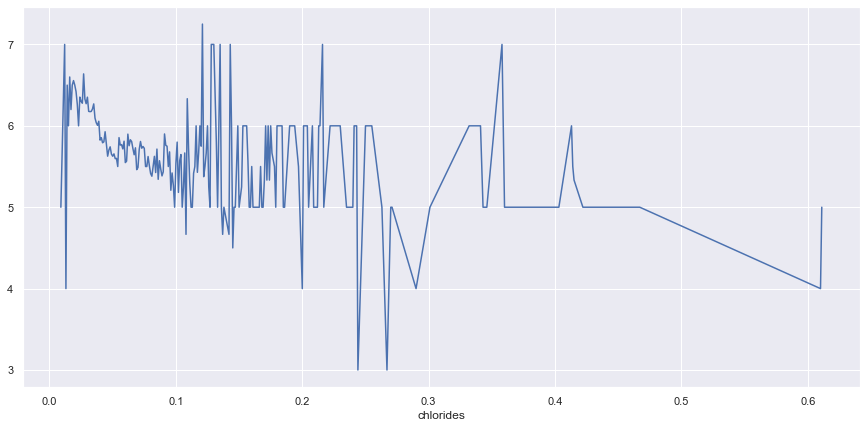

In [354]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['chlorides']).mean()['quality'].plot(ax=ax)

<AxesSubplot:xlabel='free_sulfur_dioxide'>

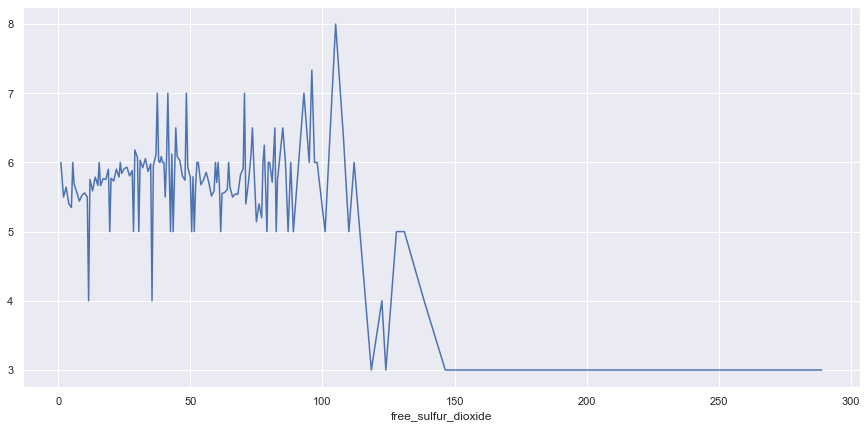

In [353]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['free_sulfur_dioxide']).mean()['quality'].plot(ax=ax)

<AxesSubplot:xlabel='total_sulfur_dioxide'>

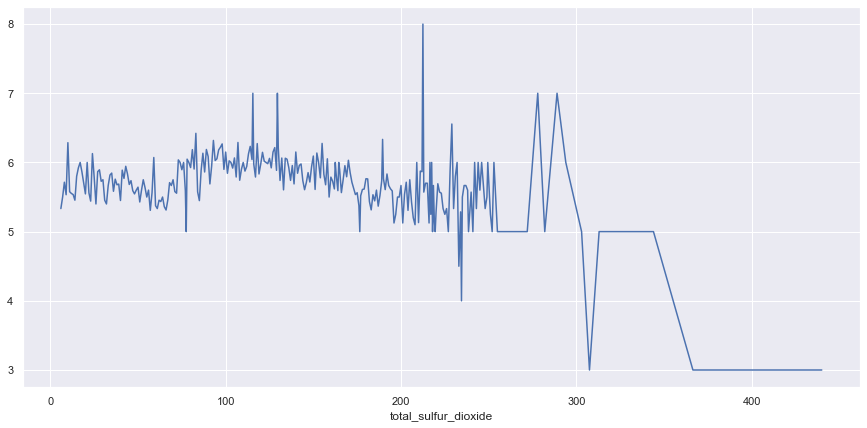

In [352]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['total_sulfur_dioxide']).mean()['quality'].plot(ax=ax)

<AxesSubplot:xlabel='density'>

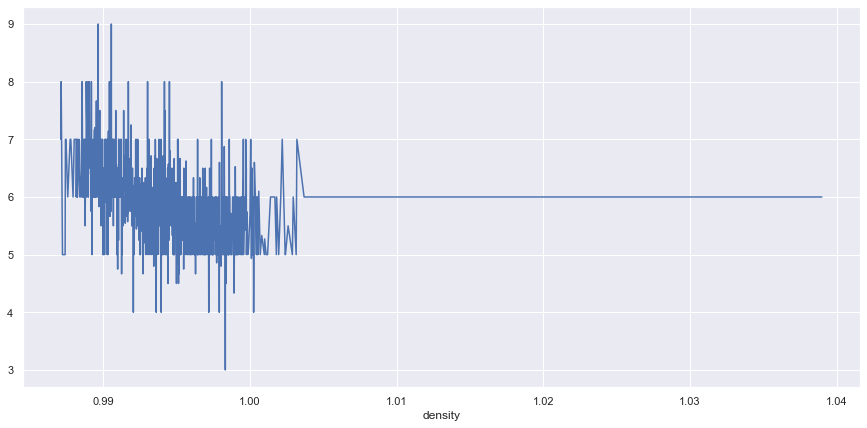

In [351]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['density']).mean()['quality'].plot(ax=ax)

<AxesSubplot:xlabel='pH'>

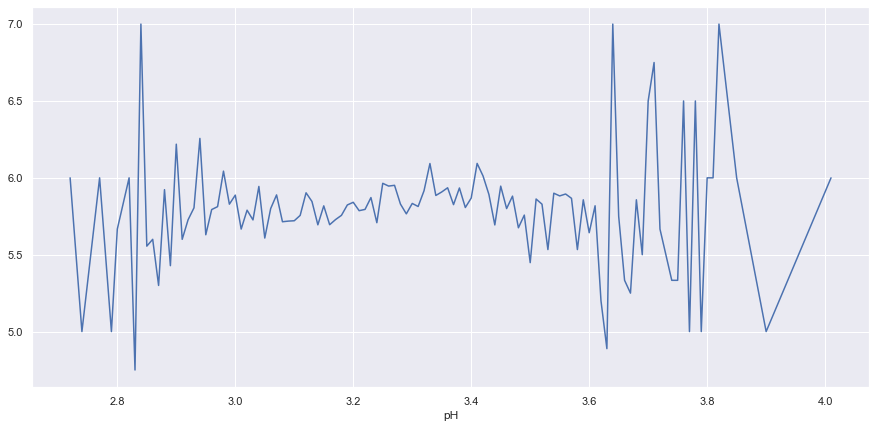

In [350]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['pH']).mean()['quality'].plot(ax=ax)

<AxesSubplot:xlabel='sulphates'>

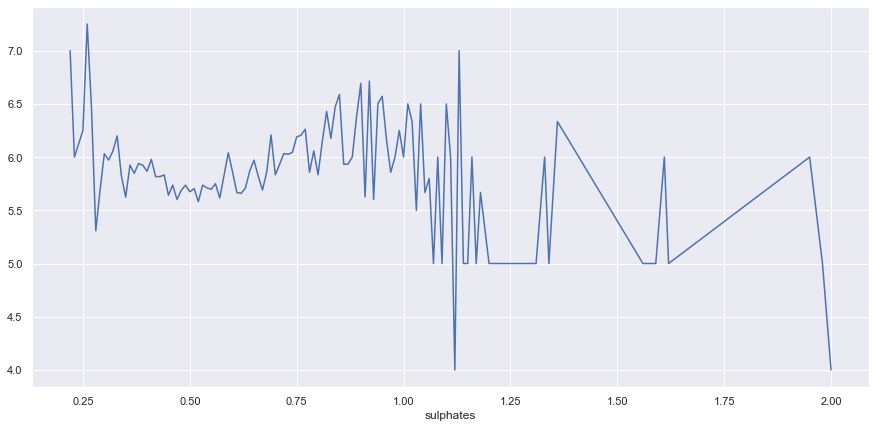

In [349]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['sulphates']).mean()['quality'].plot(ax=ax)

<AxesSubplot:xlabel='alcohol'>

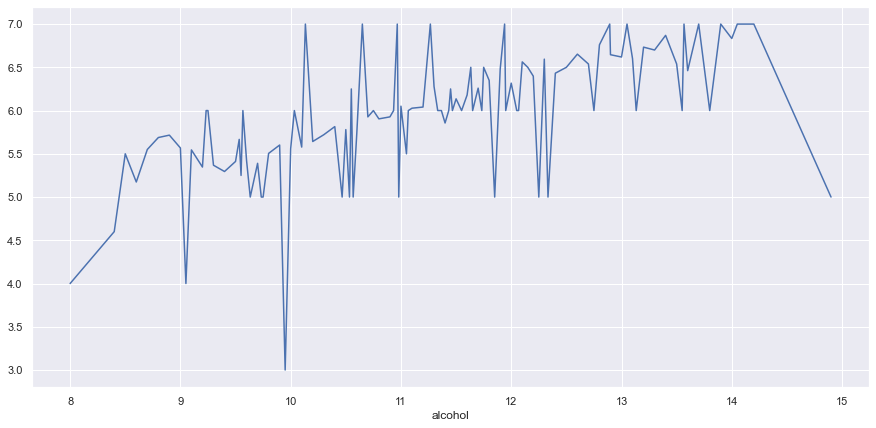

In [348]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['alcohol']).mean()['quality'].plot(ax=ax)

<AxesSubplot:xlabel='acidity_levels'>

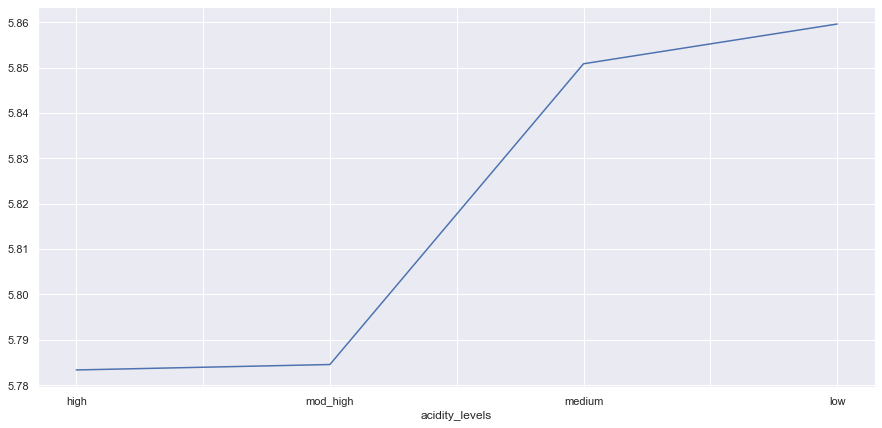

In [362]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['acidity_levels']).mean()['quality'].plot(ax=ax)

# conclusions
1- White wines have better quality than red wins

2- Low acidity have high average rating

3- High alcohol wines receive better ratings

4- Sweeter wines receive better ratings

5- Fixed acidity,citric acid,residual sugar,total sulfur dioxide are4 the chemical charactersitics which important in predicting the quality of wines 